https://facebook.github.io/prophet/docs/quick_start.html
    
Installed using conda: `conda install -c conda-forge fbprophet`

In [1]:
import pandas as pd
from fbprophet import Prophet

In [2]:
df = pd.read_csv('example_wp_log_peyton_manning.csv')
df.head()

ds         y
0  2007-12-10  9.590761
1  2007-12-11  8.519590
2  2007-12-12  8.183677
3  2007-12-13  8.072467
4  2007-12-14  7.893572

In [3]:
m = Prophet()
m.fit(df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
//anaconda3/lib/python3.7/site-packages/pystan/misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



In [4]:
future = m.make_future_dataframe(periods=365)
future.tail()

ds
3265 2017-01-15
3266 2017-01-16
3267 2017-01-17
3268 2017-01-18
3269 2017-01-19

In [5]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds      yhat  yhat_lower  yhat_upper
3265 2017-01-15  8.206497    7.494047    8.910029
3266 2017-01-16  8.531523    7.764851    9.235144
3267 2017-01-17  8.318930    7.551879    9.033613
3268 2017-01-18  8.151543    7.456576    8.905479
3269 2017-01-19  8.163477    7.427535    8.947022

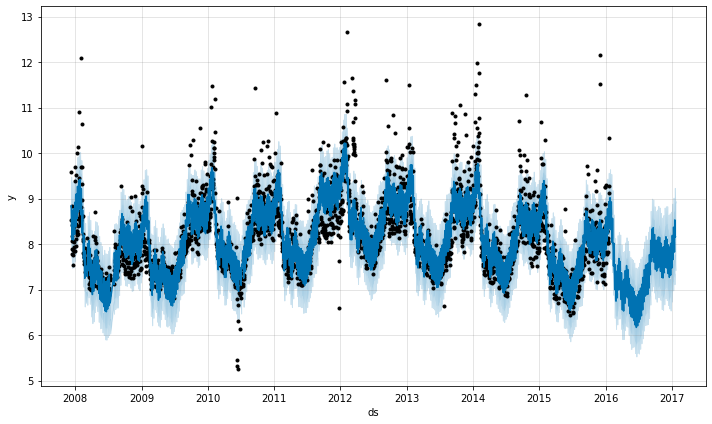

In [6]:
fig1 = m.plot(forecast)

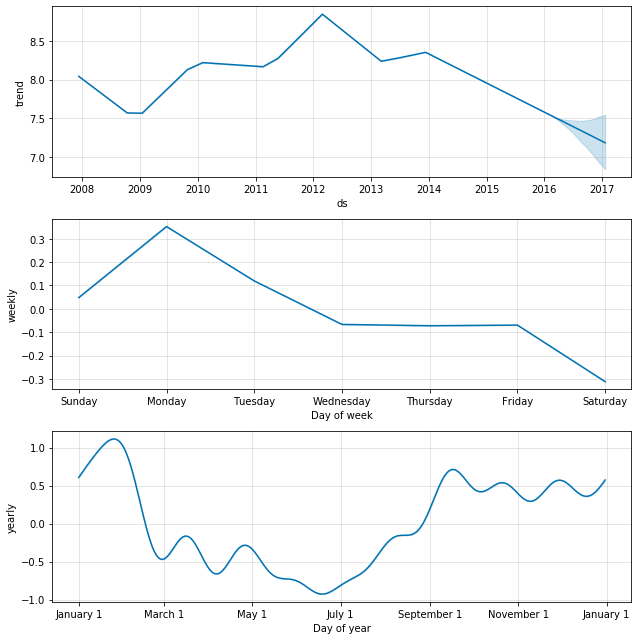

In [7]:
fig2 = m.plot_components(forecast)

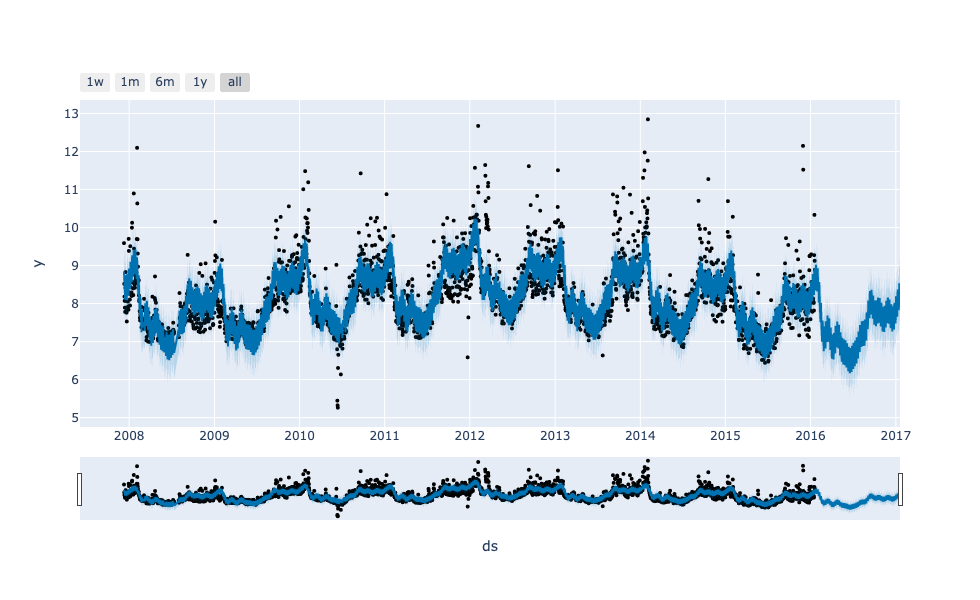

In [8]:
from fbprophet.plot import plot_plotly
import plotly.offline as py
py.init_notebook_mode()

fig = plot_plotly(m, forecast)  # This returns a plotly Figure
py.iplot(fig)

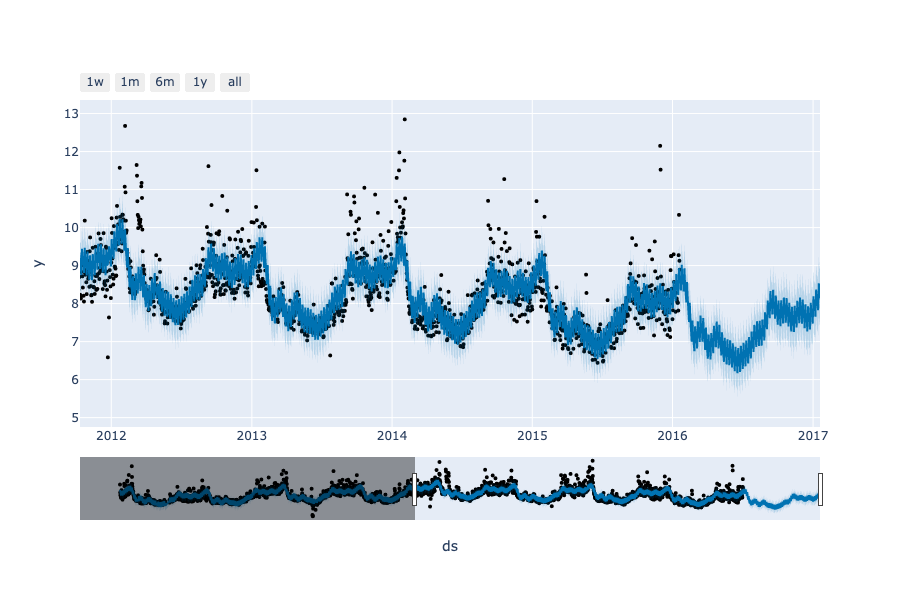

In [9]:
from IPython.display import Image
Image("newplot.png")